In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
faults_diagnostics=pd.read_csv('../data/faults_diagnostics.csv')

In [3]:
faults_diagnostics

,EventTimeStamp,RecordID,ESS_Id,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,2000-03-18 19:14:10,1211418,108604426,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,...,NaN,True,127.4,1279.0,False,NaN,0.00000,NaN,100.0,0.58
1,2000-03-18 19:14:10,1211417,108604425,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,...,NaN,True,127.4,1279.0,False,NaN,0.00000,NaN,100.0,0.58
2,2000-03-18 19:20:47,1211419,108604487,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,...,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-03-18 19:20:47,1211420,108604488,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,...,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-03-19 02:59:58,1211422,108608408,Not Reporting Data Wheel Sensor ABS Axle 2 Right,NaN,AAAI000032*AAAM000038*BB41275 *A82J140721A_9...,5W26153559,EC80ESP,BNDWS,11,...,NaN,NaN,NaN,1279.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921732,2020-03-06 13:44:45,1248453,123901925,Low (Severity Medium) Engine Coolant Level,NaN,04358814*06030918*051718174436*09401683*G1*BDR*,79904453,6X1u13D1500000000,CMMNS,0,...,NaN,NaN,NaN,1023.0,NaN,NaN,NaN,NaN,NaN,NaN
921733,2020-03-06 14:04:23,1248455,123905139,Condition Exists Engine Protection Torque Derate,NaN,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,...,32.0,True,98.6,18431.0,False,NaN,65.01096,NaN,73.2,7.83
921734,2026-05-16 14:44:11,1161753,87903706,NaN,NaN,unknown,unknown,unknown,unknown,0,...,NaN,NaN,NaN,1023.0,NaN,NaN,NaN,NaN,NaN,NaN
921735,2026-05-16 14:44:11,1161754,87903707,NaN,NaN,unknown,unknown,unknown,unknown,0,...,NaN,NaN,NaN,1023.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#dropping some columns
faults_diagnostics=faults_diagnostics.drop(['actionDescription', 'ServiceDistance', 'faultValue'], axis=1).reset_index(drop=True)
faults_diagnostics

,EventTimeStamp,RecordID,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,2000-03-18 19:14:10,1211418,108604426,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,...,0.673641,NaN,True,127.4,1279.0,False,0.00000,NaN,100.0,0.58
1,2000-03-18 19:14:10,1211417,108604425,High Voltage (Left Fuel Level Sensor),NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,...,0.673641,NaN,True,127.4,1279.0,False,0.00000,NaN,100.0,0.58
2,2000-03-18 19:20:47,1211419,108604487,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,...,NaN,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN
3,2000-03-18 19:20:47,1211420,108604488,High Voltage (Left Fuel Level Sensor),NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,...,NaN,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN
4,2000-03-19 02:59:58,1211422,108608408,Not Reporting Data Wheel Sensor ABS Axle 2 Right,AAAI000032*AAAM000038*BB41275 *A82J140721A_9...,5W26153559,EC80ESP,BNDWS,11,792,...,NaN,NaN,NaN,NaN,1279.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921732,2020-03-06 13:44:45,1248453,123901925,Low (Severity Medium) Engine Coolant Level,04358814*06030918*051718174436*09401683*G1*BDR*,79904453,6X1u13D1500000000,CMMNS,0,111,...,NaN,NaN,NaN,NaN,1023.0,NaN,NaN,NaN,NaN,NaN
921733,2020-03-06 14:04:23,1248455,123905139,Condition Exists Engine Protection Torque Derate,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,...,7.647805,32.0,True,98.6,18431.0,False,65.01096,NaN,73.2,7.83
921734,2026-05-16 14:44:11,1161753,87903706,NaN,unknown,unknown,unknown,unknown,0,5742,...,NaN,NaN,NaN,NaN,1023.0,NaN,NaN,NaN,NaN,NaN
921735,2026-05-16 14:44:11,1161754,87903707,NaN,unknown,unknown,unknown,unknown,0,5743,...,NaN,NaN,NaN,NaN,1023.0,NaN,NaN,NaN,NaN,NaN


In [5]:
faults_diagnostics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921737 entries, 0 to 921736
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   EventTimeStamp             921737 non-null  object 
 1   RecordID                   921737 non-null  int64  
 2   ESS_Id                     921737 non-null  int64  
 3   eventDescription           889644 non-null  object 
 4   ecuSoftwareVersion         666527 non-null  object 
 5   ecuSerialNumber            623200 non-null  object 
 6   ecuModel                   867546 non-null  object 
 7   ecuMake                    867546 non-null  object 
 8   ecuSource                  921737 non-null  int64  
 9   spn                        921737 non-null  int64  
 10  fmi                        921737 non-null  int64  
 11  active                     921737 non-null  bool   
 12  activeTransitionCount      921737 non-null  int64  
 13  EquipmentID                92

In [84]:
#count of trucks derated 
faults_diagnostics.groupby('EquipmentID').count()

,EventTimeStamp,RecordID,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
EquipmentID,,,,,,,,,,,,,,,,,,,,,
306,513,513,513,503,505,503,503,503,513,513,...,249,249,250,249,513,249,249,14,249,249
307,1809,1809,1809,1798,1739,1730,1763,1763,1809,1809,...,872,750,910,873,1809,881,872,131,872,872
308,496,496,496,468,471,467,485,485,496,496,...,247,125,248,247,496,247,247,20,246,247
309,5991,5991,5991,5977,5538,5512,5740,5740,5991,5991,...,2590,1086,3000,2605,5991,2603,2574,304,2567,2588
310,1184,1184,1184,1156,1116,1108,1157,1157,1184,1184,...,582,344,593,586,1184,588,581,44,581,581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,325,325,325,305,239,237,305,305,325,325,...,158,0,165,158,325,162,155,0,154,154
2143,128,128,128,98,114,109,117,117,128,128,...,64,0,65,64,128,64,64,0,64,64
2175,358,358,358,279,283,273,330,330,358,358,...,168,0,183,168,358,183,168,0,168,168


In [6]:
#changing column type
for col in ['EventTimeStamp', 'LocationTimeStamp']:
    faults_diagnostics[col]=faults_diagnostics[col].astype('datetime64[ns]')

In [7]:
faults_diagnostics.sort_values(['EquipmentID', 'EventTimeStamp']).reset_index()


,index,EventTimeStamp,RecordID,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,26842,2015-05-01 01:36:53,39670,2189989,Condition Exists Cruise Control Enable Switch,unknown,unknown,unknown,unknown,49,...,1.307656,32.0,True,89.6,255.0,False,65.66146,3276.75,0.0,2.90
1,26849,2015-05-01 01:52:08,39676,2190036,Condition Exists Cruise Control Enable Switch,unknown,unknown,unknown,unknown,49,...,NaN,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN
2,41125,2015-05-21 03:47:49,60843,2541396,Condition Exists Cruise Control Enable Switch,unknown,unknown,unknown,unknown,49,...,18.610980,32.0,True,111.2,255.0,False,64.78766,3276.75,0.0,29.00
3,41266,2015-05-21 06:51:36,61033,2543683,Condition Exists Cruise Control Enable Switch,unknown,unknown,unknown,unknown,49,...,NaN,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN
4,50177,2015-06-03 02:28:44,74435,2750424,Condition Exists Cruise Control Enable Switch,unknown,unknown,unknown,unknown,49,...,18.663810,32.0,True,116.6,255.0,False,65.79739,3276.75,0.0,28.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921732,920580,2020-02-27 08:41:12,1246317,122700679,Abnormal Update Rate Headway Controller Forwar...,NaN,NaN,CECU3B-NAMUX4,PACCR,49,...,0.000000,NaN,True,33.8,1279.0,True,0.00000,NaN,100.0,0.00
921733,920581,2020-02-27 08:42:47,1246332,122706890,Low (Severity High) Battery Potential / Power ...,5516010*202.21.0*5516502*E003.e003*5539401*25....,Z0017655,EEO-xxF112C,EATON,3,...,0.000000,NaN,True,33.8,51199.0,True,0.00000,NaN,100.0,0.00
921734,920636,2020-02-27 12:10:53,1246400,122740698,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,80092582,6X1u17D1500000000,CMMNS,0,...,1.941671,NaN,True,51.8,17407.0,True,0.00000,NaN,100.0,1.74
921735,920637,2020-02-27 12:11:33,1246399,122740697,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,80092582,6X1u17D1500000000,CMMNS,0,...,NaN,NaN,NaN,NaN,17407.0,NaN,NaN,NaN,NaN,NaN


In [21]:
#top 60 spn that cause faults
faults_diagnostics['spn'].value_counts().sort_values(ascending=False).head(60)

111       276931
929       252974
96         76152
829        73891
639        30283
97         19149
596        15386
1569       10711
1761        7467
789         7131
1068        7094
50353       6578
1067        5522
2863        4910
641         4758
1231        4313
3216        4258
792         4149
3226        4067
790         4062
807         3631
629         3602
171         3232
3251        3113
791         3105
627         3009
3464        2538
102         2292
630         2074
802         1902
157         1886
5848        1850
611         1764
793         1733
4364        1680
523531      1675
1045        1550
70          1540
51923       1532
91          1510
797         1384
934         1381
3364        1378
110         1371
3031        1318
1209        1314
3610        1266
4339        1251
245         1243
2623        1235
886         1230
1483        1224
5742        1196
1059        1184
411         1160
5743        1146
5394        1116
101         1090
1808        10

In [23]:
fully_derated=faults_diagnostics[faults_diagnostics['spn']==5246]  
fully_derated

,EventTimeStamp,RecordID,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
217,2011-01-01 00:03:22,1237840,119019218,NaN,04384413*22115617*090617144354*60701715*G1*BGT*,80035307,6X1u17D1500000000,CMMNS,0,5246,...,0.000000,NaN,True,93.2,6143.0,True,0.000000,NaN,100.0,0.00
223,2011-01-01 00:03:23,1237841,119019219,NaN,04384413*22115617*090617144354*60701715*G1*BGT*,80035307,6X1u17D1500000000,CMMNS,0,5246,...,0.000000,NaN,True,93.2,6143.0,True,0.000000,NaN,100.0,0.00
230,2011-01-01 00:03:34,1120933,77308358,NaN,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,5246,...,0.964231,32.0,True,96.8,22527.0,False,9.689507,NaN,100.0,1.45
238,2011-01-01 00:04:57,378085,7367914,NaN,04993120*00041643*042114185815*07700062*I0*BBZ*,79475366,6X1u10D1500000000,CMMNS,0,5246,...,0.554763,NaN,True,77.0,22527.0,True,0.000000,NaN,NaN,0.00
257,2011-01-01 00:16:06,378082,7367911,NaN,04993120*00041643*042114185815*07700062*I0*BBZ*,79475366,6X1u10D1500000000,CMMNS,0,5246,...,0.000000,NaN,True,102.2,22527.0,NaN,0.000000,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919342,2020-02-19 07:02:33,1244156,121610128,NaN,05317106*05005224*051718172255*09401583*G1*BDR*,79845785,6X1u13D1500000000,CMMNS,0,5246,...,1.452951,NaN,True,41.0,22527.0,NaN,0.000000,NaN,100.0,0.58
919678,2020-02-21 07:23:44,1244808,121909497,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,80092582,6X1u17D1500000000,CMMNS,0,5246,...,0.752893,NaN,True,50.0,18431.0,True,0.000000,NaN,100.0,0.00
920081,2020-02-24 15:27:26,1245454,122305096,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,80092582,6X1u17D1500000000,CMMNS,0,5246,...,0.000000,NaN,True,55.4,5119.0,True,0.000000,NaN,100.0,0.00
920083,2020-02-24 15:28:05,1245452,122305094,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,80092582,6X1u17D1500000000,CMMNS,0,5246,...,NaN,NaN,NaN,NaN,5119.0,NaN,NaN,NaN,NaN,NaN


In [37]:
fully_derated[['EquipmentID']]

,EquipmentID
217,2175
223,2175
230,1751
238,1452
257,1452
...,...
919342,1814
919678,2211
920081,2211
920083,2211


In [53]:
#putting columns we want together to calculate correlation
cor_analysis = fully_derated[['EquipmentID','EventTimeStamp',
       'AcceleratorPedal', 'BarometricPressure', 'CruiseControlActive',
       'CruiseControlSetSpeed', 'DistanceLtd', 'EngineCoolantTemperature',
       'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm',
       'EngineTimeLtd', 'FuelLevel', 'FuelLtd', 'FuelRate', 'FuelTemperature',
       'IgnStatus', 'IntakeManifoldTemperature', 'LampStatus', 'ParkingBrake',
       'Speed', 'SwitchedBatteryVoltage', 'Throttle',
       'TurboBoostPressure']]

In [32]:
corr= cor_analysis.corr()
corr

,EquipmentID,AcceleratorPedal,BarometricPressure,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,...,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IntakeManifoldTemperature,LampStatus,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
EquipmentID,1.000000,0.111465,-0.119760,-0.422833,-0.751135,-0.015087,-0.218402,-0.202445,-0.019681,-0.218273,...,0.094746,-0.772020,-0.180788,-0.693224,-0.006045,0.118540,-0.118574,-0.153913,0.268062,-0.195549
AcceleratorPedal,0.111465,1.000000,0.039639,-0.287951,-0.068871,0.132599,0.559219,0.354257,0.215937,0.542945,...,-0.077959,-0.062667,0.612121,0.294622,-0.090922,-0.101154,0.614138,-0.173819,-0.149393,0.552457
BarometricPressure,-0.119760,0.039639,1.000000,-0.000074,0.136731,-0.008057,0.101756,0.189340,0.016435,0.148442,...,-0.064413,0.138689,0.125300,0.210928,0.084564,-0.163124,0.165573,-0.104285,-0.055723,0.080766
CruiseControlSetSpeed,-0.422833,-0.287951,-0.000074,1.000000,0.405166,0.060770,-0.224544,0.018752,0.001239,-0.041081,...,0.042773,0.397581,-0.411369,-0.877567,0.101486,0.202322,-0.369540,0.746168,-0.058059,-0.395098
DistanceLtd,-0.751135,-0.068871,0.136731,0.405166,1.000000,0.022239,0.188019,0.175628,0.027363,0.192926,...,-0.067650,0.981854,0.184340,0.690441,0.000484,-0.103841,0.127786,-0.275368,-0.087857,0.198464
EngineCoolantTemperature,-0.015087,0.132599,-0.008057,0.060770,0.022239,1.000000,0.172460,-0.049320,0.966803,0.273836,...,0.014721,0.049818,0.219397,0.387378,0.709953,-0.052583,0.228292,0.015872,0.005957,0.249185
EngineLoad,-0.218402,0.559219,0.101756,-0.224544,0.188019,0.172460,1.000000,0.600550,0.262213,0.735319,...,-0.074516,0.182728,0.930996,0.523239,-0.067608,-0.388519,0.797249,-0.205668,0.062381,0.876595
EngineOilPressure,-0.202445,0.354257,0.189340,0.018752,0.175628,-0.049320,0.600550,1.000000,0.039241,0.871062,...,-0.099675,0.161093,0.584458,0.479421,-0.123786,-0.320845,0.569084,-0.278854,-0.054618,0.524108
EngineOilTemperature,-0.019681,0.215937,0.016435,0.001239,0.027363,0.966803,0.262213,0.039241,1.000000,0.380984,...,-0.027045,0.041190,0.312888,0.444873,0.618196,-0.089825,0.346157,-0.047607,-0.002282,0.335480
EngineRpm,-0.218273,0.542945,0.148442,-0.041081,0.192926,0.273836,0.735319,0.871062,0.380984,1.000000,...,-0.108699,0.192731,0.747533,0.603499,0.009237,-0.340710,0.743612,-0.209533,-0.088909,0.702915


In [39]:
#corr for this column>75%
corr['DistanceLtd']>0.75

EquipmentID                  False
AcceleratorPedal             False
BarometricPressure           False
CruiseControlSetSpeed        False
DistanceLtd                   True
EngineCoolantTemperature     False
EngineLoad                   False
EngineOilPressure            False
EngineOilTemperature         False
EngineRpm                    False
EngineTimeLtd                 True
FuelLevel                    False
FuelLtd                       True
FuelRate                     False
FuelTemperature              False
IntakeManifoldTemperature    False
LampStatus                   False
Speed                        False
SwitchedBatteryVoltage       False
Throttle                     False
TurboBoostPressure           False
Name: DistanceLtd, dtype: bool

In [33]:
#see all the column names
top_corr=corr.index
top_corr

Index(['EquipmentID', 'AcceleratorPedal', 'BarometricPressure',
       'CruiseControlSetSpeed', 'DistanceLtd', 'EngineCoolantTemperature',
       'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm',
       'EngineTimeLtd', 'FuelLevel', 'FuelLtd', 'FuelRate', 'FuelTemperature',
       'IntakeManifoldTemperature', 'LampStatus', 'Speed',
       'SwitchedBatteryVoltage', 'Throttle', 'TurboBoostPressure'],
      dtype='object')

<AxesSubplot:>

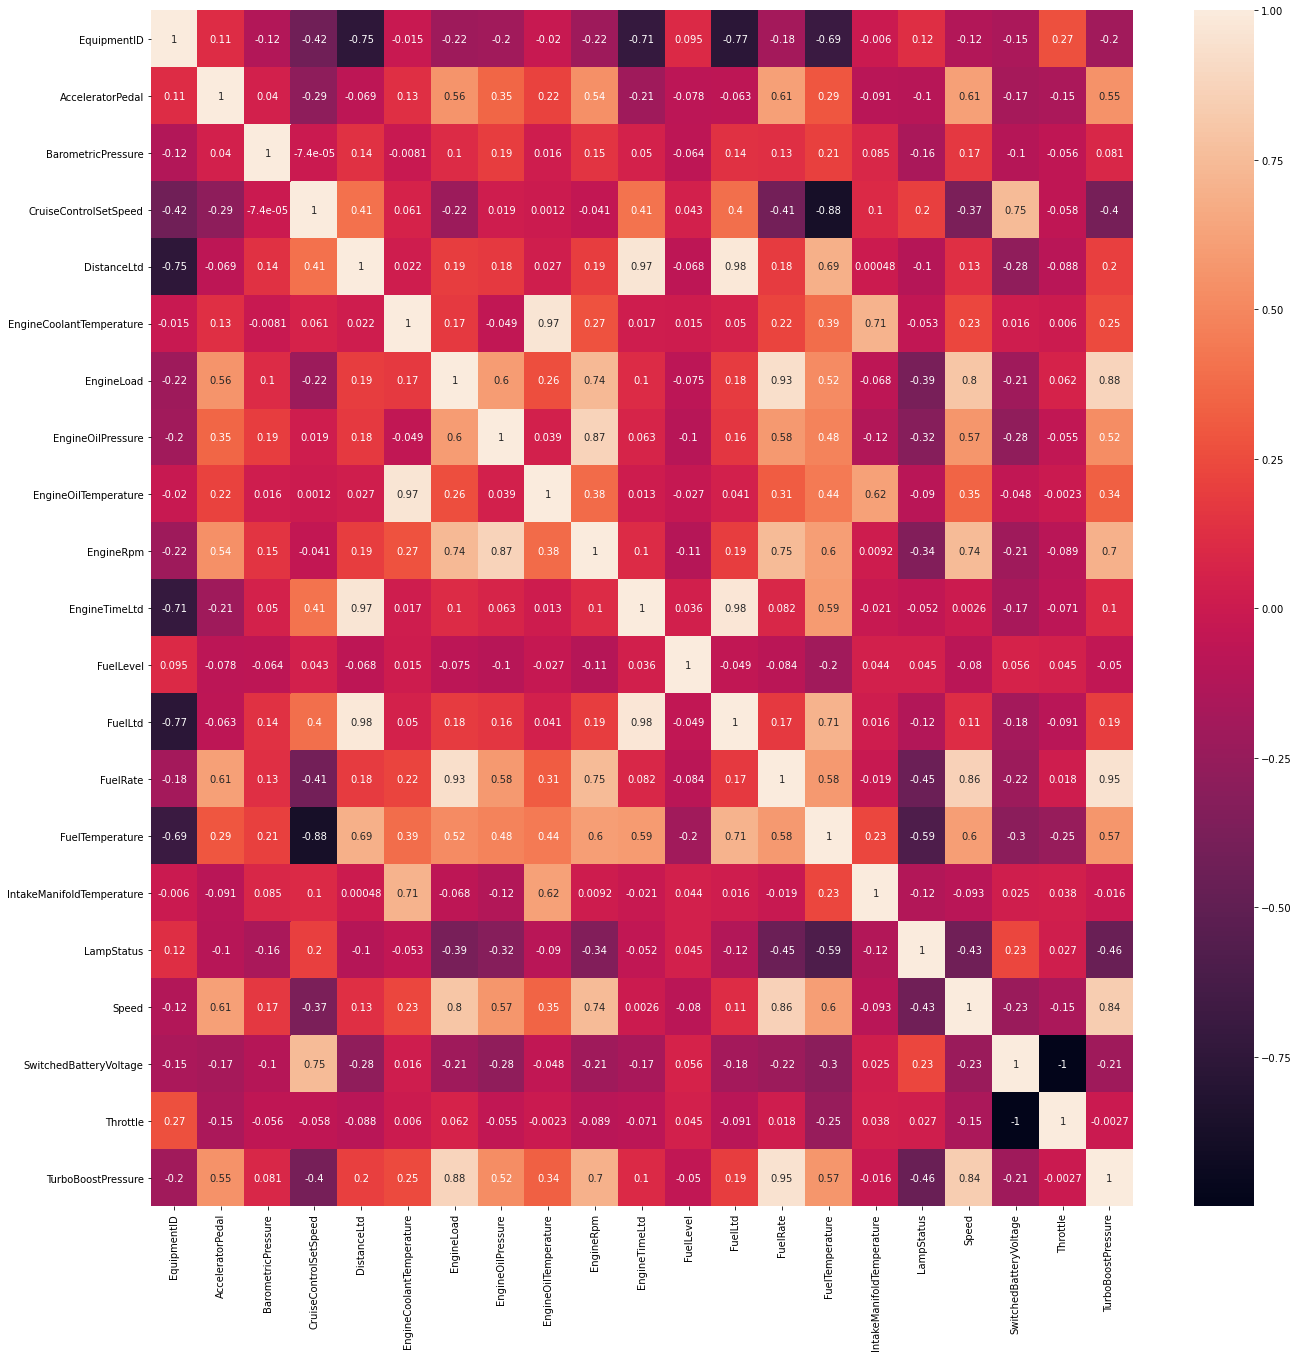

In [41]:
#create heatmap based on correlation
plt.figure(figsize=(22,22))
sns.heatmap(cor_analysis[top_corr].corr(), annot=True)

In [42]:
#setting the threshold we want for correlation
threshold = 0.75

In [43]:
#defining correlation 

def correlation(cor_analysis, threshold):
    col_corr=set() #names of all correlated columns
    corr_matrix=cor_analysis.corr()#correlation of columns in cor_analysis
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold: #want absolute coeff value
                colname=corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

In [48]:
correlation(cor_analysis, threshold)

{'DistanceLtd',
 'EngineOilTemperature',
 'EngineRpm',
 'EngineTimeLtd',
 'FuelLtd',
 'FuelRate',
 'FuelTemperature',
 'Speed',
 'Throttle',
 'TurboBoostPressure'}

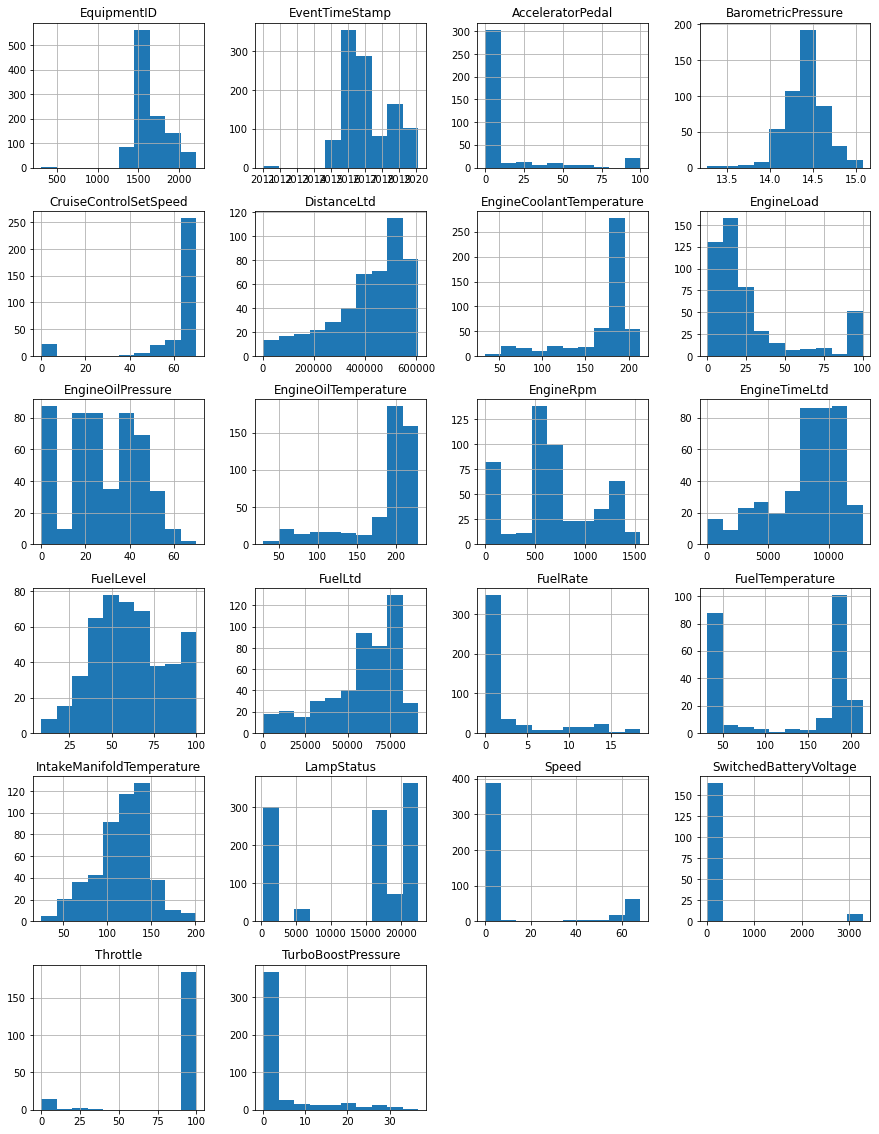

In [54]:
#creating histograms based on correlations
cor_analysis.hist(layout=(6,4), figsize=(15,20))
plt.show()

In [55]:
#putting columns together for time series analysis

time_series_analysis=fully_derated[['EquipmentID','EventTimeStamp',
       'AcceleratorPedal', 'BarometricPressure', 'CruiseControlActive',
       'CruiseControlSetSpeed', 'DistanceLtd', 'EngineCoolantTemperature',
       'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm',
       'EngineTimeLtd', 'FuelLevel', 'FuelLtd', 'FuelRate', 'FuelTemperature',
       'IgnStatus', 'IntakeManifoldTemperature', 'LampStatus', 'ParkingBrake',
       'Speed', 'SwitchedBatteryVoltage', 'Throttle','TurboBoostPressure']].set_index('EventTimeStamp')
time_series_analysis

,EquipmentID,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,...,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
EventTimeStamp,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:03:22,2175,0.0,14.4275,False,0.00000,216319.8,120.2,0.0,0.00,116.48750,...,0.000000,NaN,True,93.2,6143.0,True,0.000000,NaN,100.0,0.00
2011-01-01 00:03:23,2175,0.0,14.4275,False,0.00000,216319.8,120.2,0.0,0.00,116.48750,...,0.000000,NaN,True,93.2,6143.0,True,0.000000,NaN,100.0,0.00
2011-01-01 00:03:34,1751,100.0,14.4275,False,64.00124,505000.5,177.8,7.0,38.86,184.15630,...,0.964231,32.0,True,96.8,22527.0,False,9.689507,NaN,100.0,1.45
2011-01-01 00:04:57,1452,0.0,14.2100,False,54.68066,496853.5,120.2,16.0,36.54,134.26250,...,0.554763,NaN,True,77.0,22527.0,True,0.000000,NaN,NaN,0.00
2011-01-01 00:16:06,1452,0.0,14.2100,False,54.68066,496853.5,141.8,9.0,0.00,142.36250,...,0.000000,NaN,True,102.2,22527.0,NaN,0.000000,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-19 07:02:33,1814,0.0,14.5725,False,64.62260,527882.7,55.4,16.0,44.66,53.37500,...,1.452951,NaN,True,41.0,22527.0,NaN,0.000000,NaN,100.0,0.58
2020-02-21 07:23:44,2211,0.0,14.6450,False,0.00000,126788.6,77.0,18.0,40.60,82.00625,...,0.752893,NaN,True,50.0,18431.0,True,0.000000,NaN,100.0,0.00
2020-02-24 15:27:26,2211,0.0,14.2100,False,0.00000,126789.3,77.0,0.0,0.00,77.78750,...,0.000000,NaN,True,55.4,5119.0,True,0.000000,NaN,100.0,0.00


In [65]:
#creating a dataframe with the index of EventTimeStamp
time_series_analysis=fully_derated[['EventTimeStamp', 'DistanceLtd',
 'EngineOilTemperature','EngineRpm','EngineTimeLtd','FuelLtd']].set_index('EventTimeStamp')

In [90]:
time_series_analysis

,DistanceLtd,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLtd
EventTimeStamp,,,,,
2011-01-01 00:03:22,216319.8,116.48750,0.000,4829.05,30812.896059
2011-01-01 00:03:23,216319.8,116.48750,0.000,4829.05,30812.896059
2011-01-01 00:03:34,505000.5,184.15630,1012.625,10191.40,68730.171113
2011-01-01 00:04:57,496853.5,134.26250,645.875,9731.35,72012.905117
2011-01-01 00:16:06,496853.5,142.36250,0.000,9731.30,72012.905117
...,...,...,...,...,...
2020-02-19 07:02:33,527882.7,53.37500,699.000,11115.35,73611.938548
2020-02-21 07:23:44,126788.6,82.00625,600.875,3008.20,16905.162124
2020-02-24 15:27:26,126789.3,77.78750,0.000,3009.35,16906.350898


/Users/vahidehrasekhi/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>], dtype=object)

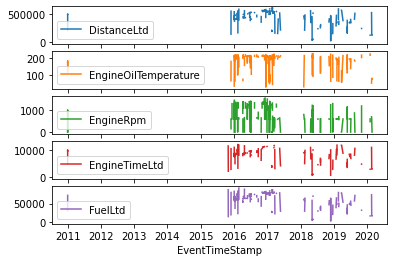

In [66]:
#plotting time series analysis for 5 columns
fig, ax=plt.subplots()

time_series_analysis.plot(subplots=True, ax=ax, figsize=(40,40))


In [67]:
#plotting time series analysis for the other 5 columns
time_series_analysis2=fully_derated[['EventTimeStamp', 
 'FuelRate','FuelTemperature','Speed','Throttle','TurboBoostPressure']].set_index('EventTimeStamp')

/Users/vahidehrasekhi/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>,
       <AxesSubplot:xlabel='EventTimeStamp'>], dtype=object)

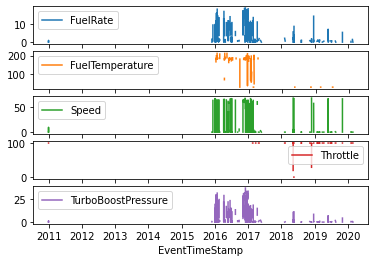

In [68]:
fig, ax=plt.subplots()

time_series_analysis2.plot(subplots=True, ax=ax, figsize=(40,40))


In [70]:
#reading in the service fault codes data
faults_code=pd.read_excel('../data/Service Fault Codes_1_0_0_167.xlsx')
faults_code.head()

,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
0,Y,111,167,Not Mapped,254,0,12,629,12,P0606,Red,Stop / Shutdown,Engine Control Module Critical Internal Failur...,Error internal to the ECM related to memory ha...
1,Y,112,167,Not Mapped,20,128,7,635,7,Not Mapped,Red,Stop / Shutdown,Engine Timing Actuator Driver Circuit - Mechan...,Mechanical failure in the engine timing actuat...
2,Y,113,167,Not Mapped,20,128,3,635,3,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,High signal voltage detected at the engine tim...
3,Y,114,167,Not Mapped,20,128,4,635,4,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,Low voltage detected at the engine timing actu...
4,Y,115,167,190,Not Mapped,Not Mapped,2,612,2,P0008,Red,Stop / Shutdown,Engine Magnetic Speed/Position Lost Both of Tw...,The ECM has detected that the primary and back...


In [72]:
#merging fault codes with fault diagnostics
full_dataset = faults_diagnostics.merge(faults_code, left_on=['spn','fmi'], right_on=['SPN','J1939 FMI'], how='left')
full_dataset.head()

,EventTimeStamp,RecordID,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
0,2000-03-18 19:14:10,1211418,108604426,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,...,Not Mapped,Not Mapped,3.0,96.0,3.0,P0463,Amber,Warning,Fuel Level (Main Tank) Sensor Circuit - Voltag...,High voltage has been detected in the Fuel Lev...
1,2000-03-18 19:14:10,1211417,108604425,High Voltage (Left Fuel Level Sensor),NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-03-18 19:20:47,1211419,108604487,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,...,Not Mapped,Not Mapped,3.0,96.0,3.0,P0463,Amber,Warning,Fuel Level (Main Tank) Sensor Circuit - Voltag...,High voltage has been detected in the Fuel Lev...
3,2000-03-18 19:20:47,1211420,108604488,High Voltage (Left Fuel Level Sensor),NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-03-19 02:59:58,1211422,108608408,Not Reporting Data Wheel Sensor ABS Axle 2 Right,AAAI000032*AAAM000038*BB41275 *A82J140721A_9...,5W26153559,EC80ESP,BNDWS,11,792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357270 entries, 0 to 1357269
Data columns (total 55 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   EventTimeStamp             1357270 non-null  datetime64[ns]
 1   RecordID                   1357270 non-null  int64         
 2   ESS_Id                     1357270 non-null  int64         
 3   eventDescription           1236941 non-null  object        
 4   ecuSoftwareVersion         1093790 non-null  object        
 5   ecuSerialNumber            1046660 non-null  object        
 6   ecuModel                   1294681 non-null  object        
 7   ecuMake                    1294681 non-null  object        
 8   ecuSource                  1357270 non-null  int64         
 9   spn                        1357270 non-null  int64         
 10  fmi                        1357270 non-null  int64         
 11  active                     1357270 no

In [79]:
#looking at algorithm description which doess not have nan
algo_des=full_dataset[full_dataset['Algorithm Description'].notnull()]
algo_des

,EventTimeStamp,RecordID,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
0,2000-03-18 19:14:10,1211418,108604426,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,...,Not Mapped,Not Mapped,3.0,96.0,3.0,P0463,Amber,Warning,Fuel Level (Main Tank) Sensor Circuit - Voltag...,High voltage has been detected in the Fuel Lev...
2,2000-03-18 19:20:47,1211419,108604487,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,...,Not Mapped,Not Mapped,3.0,96.0,3.0,P0463,Amber,Warning,Fuel Level (Main Tank) Sensor Circuit - Voltag...,High voltage has been detected in the Fuel Lev...
6,2000-03-19 09:03:22,1211444,108622594,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,...,Not Mapped,Not Mapped,3.0,96.0,3.0,P0463,Amber,Warning,Fuel Level (Main Tank) Sensor Circuit - Voltag...,High voltage has been detected in the Fuel Lev...
9,2000-03-19 10:35:14,1211447,108630527,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,...,Not Mapped,Not Mapped,3.0,96.0,3.0,P0463,Amber,Warning,Fuel Level (Main Tank) Sensor Circuit - Voltag...,High voltage has been detected in the Fuel Lev...
10,2000-03-19 10:51:28,1211449,108631659,Low (Severity Medium) Engine Coolant Level,04358814*06075794*030816202706*09400153*G1*BDR*,79921284,6X1u13D1500000000,CMMNS,0,111,...,Not Mapped,Not Mapped,1.0,111.0,18.0,P2560,Amber,Warning,Coolant Level - Data Valid But Below Normal Op...,Low engine coolant level detected.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357258,2020-03-06 13:10:45,1248444,123896499,High (Severity Low) Water In Fuel Indicator,04358814*06027020*051718174436*09401683*G1*BDR*,79903052,6X1u13D1500000000,CMMNS,0,97,...,Not Mapped,Not Mapped,0.0,97.0,15.0,P2269,Maintenance,Maintenance,Water in Fuel Indicator - Data Valid But Above...,Water has been detected in the fuel filter.
1357260,2020-03-06 13:13:41,1248445,123896835,High (Severity Low) Water In Fuel Indicator,04358814*06027020*051718174436*09401683*G1*BDR*,79903052,6X1u13D1500000000,CMMNS,0,97,...,Not Mapped,Not Mapped,0.0,97.0,15.0,P2269,Maintenance,Maintenance,Water in Fuel Indicator - Data Valid But Above...,Water has been detected in the fuel filter.
1357261,2020-03-06 13:19:01,1248446,123898348,High (Severity Low) Water In Fuel Indicator,04358814*06027888*012618213404*09401682*G1*BDR*,79902398,6X1u13D1500000000,CMMNS,0,97,...,Not Mapped,Not Mapped,0.0,97.0,15.0,P2269,Maintenance,Maintenance,Water in Fuel Indicator - Data Valid But Above...,Water has been detected in the fuel filter.
1357262,2020-03-06 13:42:48,1248452,123901805,Low (Severity Medium) Engine Coolant Level,04358814*06030918*051718174436*09401683*G1*BDR*,79904453,6X1u13D1500000000,CMMNS,0,111,...,Not Mapped,Not Mapped,1.0,111.0,18.0,P2560,Amber,Warning,Coolant Level - Data Valid But Below Normal Op...,Low engine coolant level detected.


In [83]:
#top 20 algo descriptions
algo_des['Algorithm Description'].value_counts().head(20)

Low engine coolant level detected.                                                                        272399
High voltage has been detected in the Fuel Level sensor circuit.                                           70741
The SAE J1939 Datalink is intermittent or erratic.                                                         29004
The ECM has a communication error.                                                                         29004
Water has been detected in the fuel filter.                                                                13950
High voltage detected at the water in fuel circuit.                                                         4850
High Voltage has been detected in the Water if Fuel Indicator Sensor Circuit.                               4850
Low voltage has been detected in the Fuel Level sensor circuit.                                             4634
No Lamp Version of 195                                                                          

In [73]:
#size of spn=5246 grouped by equipment id and algo description
full_dataset[full_dataset['spn']==5246].groupby('Algorithm Description')['EquipmentID'].size()


Algorithm Description
SCR inducement - Least Severe - Fault Code 3712 is most severe  inducement error.         107
SCR inducement of 5 mph derate - Fault Code 4134 is the least severe inducement error.    784
Name: EquipmentID, dtype: int64

In [74]:
full_dataset[full_dataset['spn']!=5246].groupby('Algorithm Description')['EquipmentID'].size()


Algorithm Description
A calibration mismatch between VGT actuator and the ECM has been detected.                                                                                                                                                                                            109
Aftertreatment NOx (Catalyst Exhaust NOx) sensor communication to the ECM via J1939 abnormal                                                                                                                                                                         1519
Amber lamp version of 175                                                                                                                                                                                                                                             303
Amber lamp version of 177                                                                                                                                                           